In [34]:
print ("The St Pearson coefficient of .84 suggests that there is a postive correlation between Tumor Volume and Weight")
print ("Based on the box chart Capomulin had a low and condesnsed IQR, suggesting more consistent results in the study between the 4 drugs sampled in treament_list ")
print ("The results in the study with the drug Infubinol produced an outlier with a Tumor Volume of 36., suggesting a potential skew in the results of measures of central tendancy")

The St Pearson coefficient of .84 suggests that there is a postive correlation between Tumor Volume and Weight
Based on the box chart Capomulin had a low and condesnsed IQR, suggesting more consistent results in the study between the 4 drugs sampled in treament_list 
The results in the study with the drug Infubinol produced an outlier with a Tumor Volume of 36., suggesting a potential skew in the results of measures of central tendancy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedmousedata = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
combinedmousedata

# Display the data table for preview
combinedmousedata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Check the number of mice.
countmice=len(combinedmousedata['Mouse ID'].unique())
countmice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
singlemousedata=combinedmousedata.loc[combinedmousedata.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
singlemousedata

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatedrop = combinedmousedata.set_index('Mouse ID')
duplicatemouse = duplicatedrop.loc['g989', :]
duplicatemouse

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandupes = duplicatedrop.drop(index = "g989")
cleandata = cleandupes.reset_index()
cleandata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Check the number of mice in the clean DataFrame.
cleanstudydata=combinedmousedata[combinedmousedata['Mouse ID'].isin(singlemousedata)==False]
len(cleanstudydata['Mouse ID'].unique())

248

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use this straighforward method, create multiple series and put them all in a dataframe at the end.
mousestats=combinedmousedata.groupby(['Drug Regimen'])
tumormean=mousestats['Tumor Volume (mm3)'].mean()
tumormedian=mousestats['Tumor Volume (mm3)'].median()
tumorstd=mousestats['Tumor Volume (mm3)'].std()
tumorvar=mousestats['Tumor Volume (mm3)'].var()
tumorsem=mousestats['Tumor Volume (mm3)'].sem()

tumorsumdf=pd.DataFrame({"Mean Tumor Volume":tumormean,
                        'Median Tumor Volume':tumormedian,
                        "Tumor Volume Variance":tumorvar,
                        'Tumor Volume Standarad Dev':tumorstd,
                        'Tumor Volume Standard Error':tumorsem})
tumorsumdf

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standarad Dev,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use method to produce everything with a single groupby function

mouseagg=combinedmousedata.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median','std','var','sem']})
mouseagg

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.322552  50.854632  6.507770  42.351070  0.512884
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

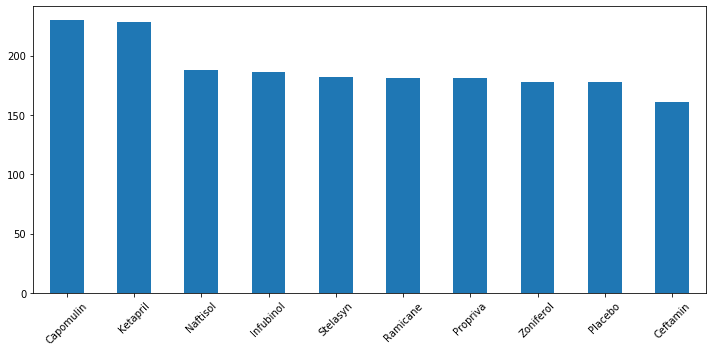

In [12]:
#Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
#Pandas can also plot multiple columns if the DataFrame includes them
pop=combinedmousedata['Drug Regimen'].value_counts() 
popplot = pop.plot(kind="bar", figsize=(10,5))

#PandasPlot.set_xticklabels() can be used to set the tick labels as well
popplot.set_xticklabels(combinedmousedata["Drug Regimen"].unique(), rotation=45)
plt.tight_layout() 
pop
plt.show()

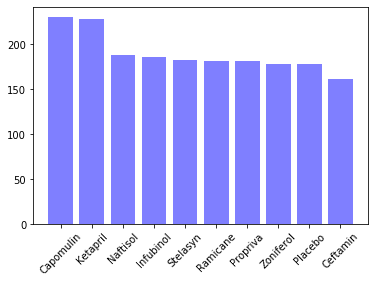

In [13]:
#Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#mice = [230, 228, 188, 186, 182,181,181,178,178,161]
mice=(combinedmousedata['Drug Regimen'].value_counts())
x_axis = np.arange(len(mice))

plt.bar(x_axis, mice, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, (combinedmousedata['Drug Regimen'].unique()))
plt.xticks(rotation=45)

plt.show()

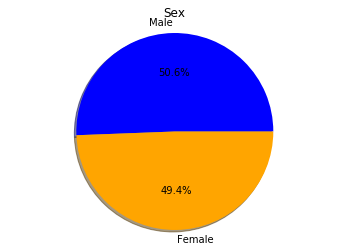

In [14]:
#Generate a pie plot showing the distribution of female versus male mice using pandas
# DATA SET 3
gender = ["Male", "Female"]
sex = combinedmousedata['Sex'].value_counts()
sex=round(sex)
colors = ["blue", "orange"]


plt.title("Sex")
plt.pie(sex, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.show()

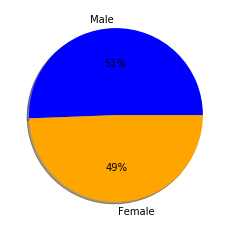

In [15]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
gender = ["Male", "Female"]

# The values of each section of the pie chart
sex = (combinedmousedata['Sex'].value_counts())

# The colors of each section of the pie chart
colors = ["blue", "orange"]

plt.pie(sex, labels=gender, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=0)
plt.show()

In [16]:
#Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
maxtumor=cleandata.drop_duplicates(subset=['Mouse ID'], keep='last')
maxtumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,f932,0,45.000000,0,Ketapril,Male,15,29
20,x336,0,45.000000,0,Naftisol,Female,4,29
53,h428,0,45.000000,0,Ketapril,Female,1,27
55,v199,0,45.000000,0,Naftisol,Female,17,29
108,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [33]:
#Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    volume=maxtumor.loc[maxtumor["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_list.append(volume)
    # add subset to tumor volume data list
    
    # Determine outliers using upper and lower bounds
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

# print(f"The lower quartile of volume is: {lowerq}")
# print(f"The upper quartile of volume is: {upperq}")
# print(f"The interquartile range of volume is: {iqr}")
# print(f"The the median of volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#     print(f"Values below {lower_bound} could be outliers.")
#     print(f"Values above {upper_bound} could be outliers.")
    outliers=volume.loc[(volume<lower_bound) | (volume>upper_bound)]
    print (f'{drug}potential outliers : {[outliers]}')
     

Capomulinpotential outliers : [Series([], Name: Tumor Volume (mm3), dtype: float64)]
Ramicanepotential outliers : [Series([], Name: Tumor Volume (mm3), dtype: float64)]
Infubinolpotential outliers : [416    36.321346
Name: Tumor Volume (mm3), dtype: float64]
Ceftaminpotential outliers : [Series([], Name: Tumor Volume (mm3), dtype: float64)]


In [32]:
maxtumor[maxtumor.index==416]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
416,c326,5,36.321346,0,Infubinol,Female,18,25


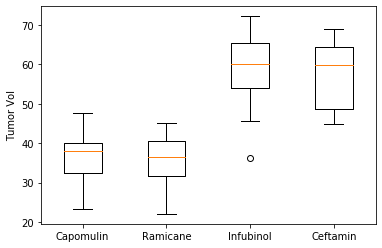

In [27]:
fig1, ax1 = plt.subplots()
#ax1.set_title()
ax1.set_ylabel('Tumor Vol')
ax1.boxplot(tumor_vol_list,labels=treatment_list)

plt.show()

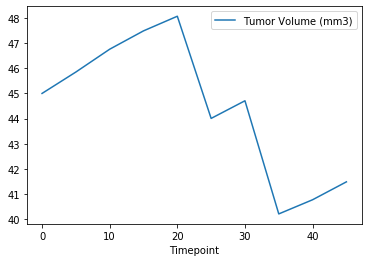

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
lineplot=combinedmousedata.loc[combinedmousedata['Mouse ID'] == 'l509']
lineplot
specline=lineplot[['Tumor Volume (mm3)','Timepoint']]

lines = lineplot.plot.line(x='Timepoint', y='Tumor Volume (mm3)')

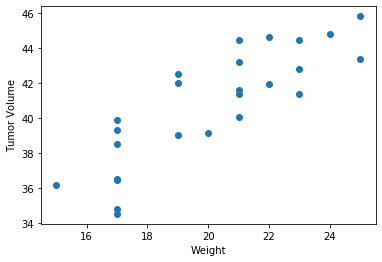

In [21]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capdata=combinedmousedata.loc[combinedmousedata['Drug Regimen'] == 'Capomulin']
capdatadf=capdata.groupby('Mouse ID').agg({'Weight (g)':['mean'], 
                         'Tumor Volume (mm3)':'mean' 
                         })
# For the first example, determine which pairs of factors are correlated. 
plt.scatter(capdatadf.iloc[:,0],capdatadf.iloc[:,1])
plt.xlabel('Weight')
plt.ylabel('Tumor Volume') 
plt.show()

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=st.pearsonr(capdatadf['Tumor Volume (mm3)']['mean'],capdatadf['Weight (g)']['mean'])
correlation

(0.8419363424694717, 1.322572243471279e-07)

y = 0.95x + 21.55


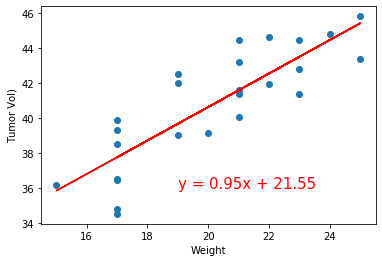

In [23]:
# Add the linear regression equation and line to plot
x_values = capdatadf["Weight (g)"]["mean"]
y_values = capdatadf['Tumor Volume (mm3)']["mean"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(19,36),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Vol)')

print (line_eq)
plt.show()